In [1]:
#KNNClassification

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Classified Data')

In [4]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Unnamed: 0      1000 non-null int64
WTT             1000 non-null float64
PTI             1000 non-null float64
EQW             1000 non-null float64
SBI             1000 non-null float64
LQE             1000 non-null float64
QWG             1000 non-null float64
FDJ             1000 non-null float64
PJF             1000 non-null float64
HQE             1000 non-null float64
NXJ             1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(2)
memory usage: 93.8 KB


In [10]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [11]:
import seaborn as sb

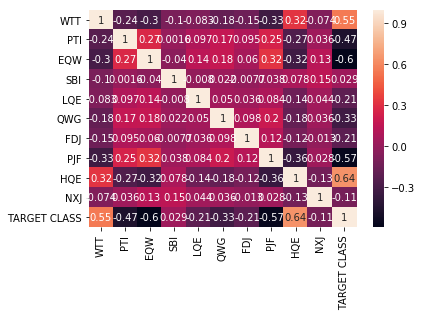

In [13]:
sb.heatmap(df.corr(),annot=True)

In [14]:
df.corr()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
WTT,1.000000,-0.235255,-0.301018,-0.101517,-0.083401,-0.183628,-0.148100,-0.330977,0.324981,-0.073889,0.551394
PTI,-0.235255,1.000000,0.271908,0.001580,0.097322,0.173701,0.095060,0.246387,-0.266242,0.035834,-0.468748
EQW,-0.301018,0.271908,1.000000,-0.040291,0.144539,0.182021,0.059533,0.323857,-0.324656,0.126143,-0.598120
SBI,-0.101517,0.001580,-0.040291,1.000000,-0.007983,0.022026,-0.007666,0.037767,0.078032,0.145045,0.028874
LQE,-0.083401,0.097322,0.144539,-0.007983,1.000000,0.049944,0.035750,0.083734,-0.143929,0.044496,-0.205043
QWG,-0.183628,0.173701,0.182021,0.022026,0.049944,1.000000,0.098062,0.199189,-0.181809,0.036078,-0.327664
FDJ,-0.148100,0.095060,0.059533,-0.007666,0.035750,0.098062,1.000000,0.122888,-0.116969,-0.012923,-0.214885
PJF,-0.330977,0.246387,0.323857,0.037767,0.083734,0.199189,0.122888,1.000000,-0.363736,0.028012,-0.571483
HQE,0.324981,-0.266242,-0.324656,0.078032,-0.143929,-0.181809,-0.116969,-0.363736,1.000000,-0.129283,0.643989
NXJ,-0.073889,0.035834,0.126143,0.145045,0.044496,0.036078,-0.012923,0.028012,-0.129283,1.000000,-0.111730


In [15]:
df.drop(['SBI'],axis=1,inplace=True)

In [16]:
df.corr()

,WTT,PTI,EQW,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
WTT,1.000000,-0.235255,-0.301018,-0.083401,-0.183628,-0.148100,-0.330977,0.324981,-0.073889,0.551394
PTI,-0.235255,1.000000,0.271908,0.097322,0.173701,0.095060,0.246387,-0.266242,0.035834,-0.468748
EQW,-0.301018,0.271908,1.000000,0.144539,0.182021,0.059533,0.323857,-0.324656,0.126143,-0.598120
LQE,-0.083401,0.097322,0.144539,1.000000,0.049944,0.035750,0.083734,-0.143929,0.044496,-0.205043
QWG,-0.183628,0.173701,0.182021,0.049944,1.000000,0.098062,0.199189,-0.181809,0.036078,-0.327664
FDJ,-0.148100,0.095060,0.059533,0.035750,0.098062,1.000000,0.122888,-0.116969,-0.012923,-0.214885
PJF,-0.330977,0.246387,0.323857,0.083734,0.199189,0.122888,1.000000,-0.363736,0.028012,-0.571483
HQE,0.324981,-0.266242,-0.324656,-0.143929,-0.181809,-0.116969,-0.363736,1.000000,-0.129283,0.643989
NXJ,-0.073889,0.035834,0.126143,0.044496,0.036078,-0.012923,0.028012,-0.129283,1.000000,-0.111730
TARGET CLASS,0.551394,-0.468748,-0.598120,-0.205043,-0.327664,-0.214885,-0.571483,0.643989,-0.111730,1.000000


In [17]:
df.head()

,WTT,PTI,EQW,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
ss=StandardScaler()

In [20]:
scaled_array=ss.fit_transform(df.drop('TARGET CLASS',axis=1))

In [21]:
scaled_array

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [22]:
X=pd.DataFrame(scaled_array,columns=df.columns[:-1])

In [23]:
X.head()

,WTT,PTI,EQW,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [24]:
Y=df['TARGET CLASS']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size = 0.3)

In [28]:
from sklearn.svm import SVC

In [29]:
from sklearn.metrics import confusion_matrix

In [31]:
model=SVC()

In [32]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
ypred=model.predict(X_test)

In [34]:
confusion_matrix(y_test,ypred)

array([[129,   9],
       [ 17, 145]], dtype=int64)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn=KNeighborsClassifier(n_neighbors=1)#knn classification hmog woh point use krte hai jaise k=1 toh 1 min distance points

In [37]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [38]:
ypred1=knn.predict(X_test)

In [39]:
len(y_test)

300

In [40]:
len(ypred1)

300

In [41]:
import numpy as np

In [42]:
np.mean(ypred1!=y_test)

0.07666666666666666

In [46]:
error_list=[]
for i in range(1,41):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    ypred2=knn.predict(X_test)
    error_list.append(np.mean(ypred2!=y_test))

In [50]:
error_list

[0.07666666666666666,
 0.09333333333333334,
 0.07333333333333333,
 0.09333333333333334,
 0.08,
 0.08666666666666667,
 0.08,
 0.07333333333333333,
 0.06666666666666667,
 0.07,
 0.07,
 0.07,
 0.06666666666666667,
 0.07666666666666666,
 0.07,
 0.08,
 0.07,
 0.07333333333333333,
 0.06666666666666667,
 0.08,
 0.08,
 0.08,
 0.07333333333333333,
 0.07,
 0.07,
 0.07,
 0.06666666666666667,
 0.07333333333333333,
 0.07333333333333333,
 0.07333333333333333,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07666666666666666,
 0.07333333333333333,
 0.08,
 0.07333333333333333,
 0.07333333333333333]

In [49]:
np.argmin(error_list)

8